Epoch: 100, Validation Loss: 2983.005019 (Best)
Epoch: 200, Validation Loss: 2857.574600 (Best)
Epoch: 300, Validation Loss: 2768.329363 (Best)
Epoch: 400, Validation Loss: 2698.373171 (Best)
Epoch: 500, Validation Loss: 2633.378472 (Best)


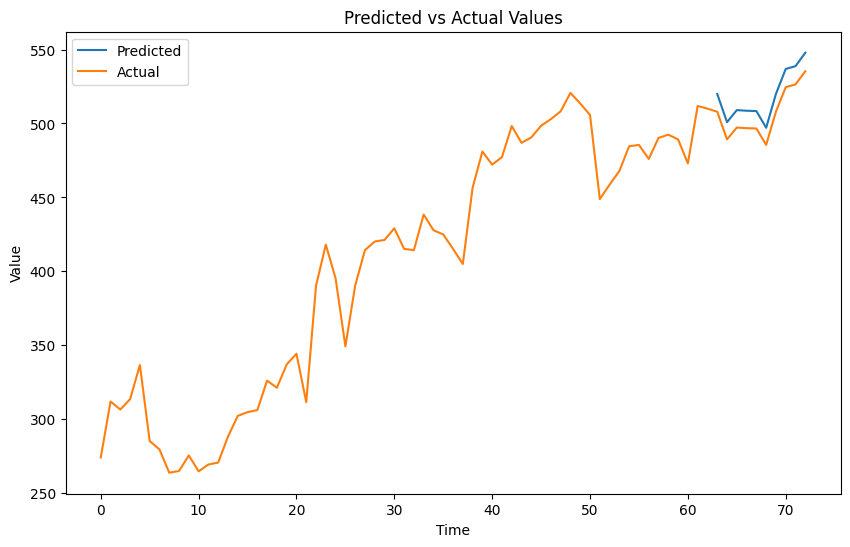

In [40]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Serie temporal
palg = np.array([274.08, 311.91, 306.51, 313.52, 336.59, 285.2, 279.55, 263.76, 264.95, 275.45, 264.7, 269.31, 270.64, 288.16, 302.2, 304.73, 306.14, 326.07, 321.21, 337, 344.25, 311.48, 390.27, 418.05, 395.19, 349.23, 390.37, 414.34, 420.15, 421.23, 429.11, 415.2, 414.3, 438.41, 427.78, 424.95, 415.2, 404.94, 456.48, 481.03, 472.15, 477.24, 498.27, 486.91, 490.58, 498.47, 502.93, 508.23, 520.68, 513.49, 505.76, 448.85, 458.61, 467.87, 484.6, 485.48, 476.02, 490.22, 492.43, 489.23, 472.99, 511.83, 510.04, 507.94, 489.25, 497.22, 496.82, 496.6, 485.52, 507.99, 524.56, 526.41, 535.32])


# Convert the time series data to a PyTorch tensor
palg_tensor = torch.tensor(palg, dtype=torch.float32).unsqueeze(1)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # Aumentar el número de neuronas en la primera capa oculta
        self.fc2 = nn.Linear(128, 128)  # Añadir una segunda capa oculta
        self.fc3 = nn.Linear(128, 64)  # Reducir el número de neuronas en la última capa oculta
        self.fc4 = nn.Linear(64, 1)  # Capa de salida con una sola neurona para predecir un valor

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reducir la tasa de aprendizaje

# Train the model
num_epochs = 500  # Aumentar el número de épocas
val_step = 100
val_losses = []
train_losses = []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i in range(len(palg_tensor) - 10):
        optimizer.zero_grad()
        input_tensor = palg_tensor[i].unsqueeze(0)
        target_tensor = palg_tensor[i + 10].unsqueeze(0)
        output = model(input_tensor)
        loss = criterion(output, target_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / (len(palg_tensor) - 10))

    if (epoch + 1) % val_step == 0:
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for i in range(len(palg_tensor) - 10):
                input_tensor = palg_tensor[i].unsqueeze(0)
                target_tensor = palg_tensor[i + 10].unsqueeze(0)
                output = model(input_tensor)
                loss = criterion(output, target_tensor)
                val_loss += loss.item()

        val_loss /= (len(palg_tensor) - 10)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            print(f"Epoch: {epoch + 1}, Validation Loss: {val_loss:.6f} (Best)")
        else:
            print(f"Epoch: {epoch + 1}, Validation Loss: {val_loss:.6f}")
        model.train()

# Predict the last 10 values
model.eval()
with torch.no_grad():
    predicted =[]
    for i in range(len(palg_tensor) - 10, len(palg_tensor)):
        input_tensor = palg_tensor[i].unsqueeze(0)
        output = model(input_tensor)
        predicted.append(output.numpy())
    predicted = np.concatenate(predicted)



# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(palg_tensor.numpy().flatten()) - 10, len(palg_tensor.numpy().flatten())), predicted, label='Predicted')
plt.plot(np.arange(len(palg_tensor.numpy().flatten())), palg_tensor.numpy().flatten(), label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()










Epoch [100/500], Loss: 118314.500000
Epoch [200/500], Loss: 8636.814453
Epoch [300/500], Loss: 2348.061768
Epoch [400/500], Loss: 2286.114258
Epoch [500/500], Loss: 2285.862061
100


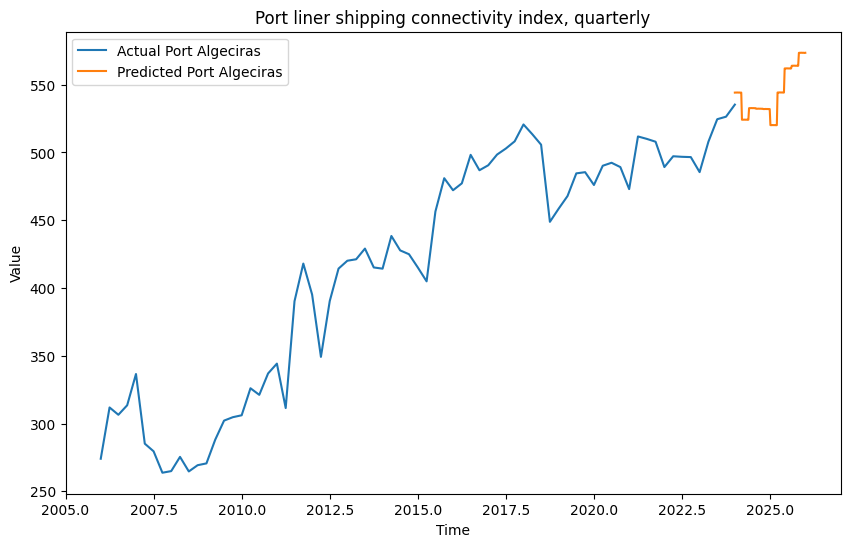

In [69]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Serie temporal
palg = np.array([274.08, 311.91, 306.51, 313.52, 336.59, 285.2, 279.55, 263.76, 264.95, 275.45, 264.7, 269.31, 270.64, 288.16, 302.2, 304.73, 306.14, 326.07, 321.21, 337, 344.25, 311.48, 390.27, 418.05, 395.19, 349.23, 390.37, 414.34, 420.15, 421.23, 429.11, 415.2, 414.3, 438.41, 427.78, 424.95, 415.2, 404.94, 456.48, 481.03, 472.15, 477.24, 498.27, 486.91, 490.58, 498.47, 502.93, 508.23, 520.68, 513.49, 505.76, 448.85, 458.61, 467.87, 484.6, 485.48, 476.02, 490.22, 492.43, 489.23, 472.99, 511.83, 510.04, 507.94, 489.25, 497.22, 496.82, 496.6, 485.52, 507.99, 524.56, 526.41, 535.32])

# Convertir la serie temporal en un tensor de PyTorch
palg_tensor = torch.tensor(palg, dtype=torch.float32).unsqueeze(1)


# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output 10 values simultaneously

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
num_epochs = 500
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    optimizer.zero_grad()
    input_tensor = palg_tensor[:-10]
    target_tensor = palg_tensor[10:]
    output = model(input_tensor)
    loss = criterion(output, target_tensor)
    loss.backward()
    optimizer.step()
    running_loss = loss.item()

    train_losses.append(running_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.6f}")

# Predict the next 10 values
model.eval()
with torch.no_grad():
    input_tensor = palg_tensor[-10:].unsqueeze(0)
    predicted = model(input_tensor).numpy().flatten()

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(2006, 2024, len(palg_tensor)), palg_tensor.numpy().flatten(), label='Actual Port Algeciras')
plt.plot(np.linspace(2024, 2026,100), predicted, label='Predicted Port Algeciras')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Port liner shipping connectivity index, quarterly')
plt.legend()
plt.show()
predalg=predicted
palgppl=palg_tensor.numpy().flatten()

Epoch [100/500], Loss: 136322.500000
Epoch [200/500], Loss: 9739.233398
Epoch [300/500], Loss: 1602.634766
Epoch [400/500], Loss: 1486.628540
Epoch [500/500], Loss: 1486.074829


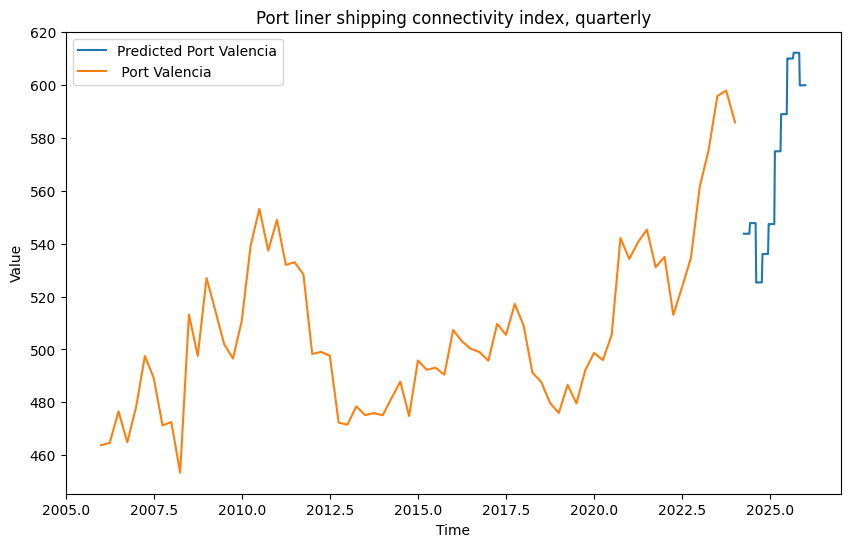

In [71]:
# Serie temporal de ejemplo (reemplaza esto por tu serie temporal real)
palg = np.array([463.8, 464.67, 476.61, 464.92, 478.21, 497.54, 489.28, 471.29, 472.55, 453.4,
          513.18, 497.58, 527.02, 514.64, 501.99, 496.55, 510.89, 539.24, 553.17, 537.39,
          549.05, 531.98, 532.98, 528.36, 498.29, 499.08, 497.6, 472.34, 471.57, 478.47,
          475.19, 475.96, 475.12, 481.59, 487.84, 474.83, 495.83, 492.32, 493.12, 490.46,
          507.35, 503.09, 500.25, 499.01, 495.74, 509.69, 505.53, 517.21, 509.09, 491.29,
          487.74, 479.79, 475.99, 486.67, 479.6, 492.17, 498.7, 496.01, 505.51, 542.13,
          534.22, 540.59, 545.34, 531.08, 535.01, 513.09, 523.62, 534.64, 561.53, 575.25,
          595.79, 597.9, 585.9])

# Convertir la serie temporal en un tensor de PyTorch
palg_tensor = torch.tensor(palg, dtype=torch.float32).unsqueeze(1)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output 10 values simultaneously

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
num_epochs = 500
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    optimizer.zero_grad()
    input_tensor = palg_tensor[:-10]
    target_tensor = palg_tensor[10:]
    output = model(input_tensor)
    loss = criterion(output, target_tensor)
    loss.backward()
    optimizer.step()
    running_loss = loss.item()

    train_losses.append(running_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.6f}")

# Predict the next 10 values
model.eval()
with torch.no_grad():
    input_tensor = palg_tensor[-10:].unsqueeze(0)
    predicted = model(input_tensor).numpy().flatten()

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(2024.25,2026,100), predicted, label='Predicted Port Valencia')
plt.plot(np.linspace(2006,2024,len(palg_tensor.numpy().flatten())), palg_tensor.numpy().flatten(), label=' Port Valencia')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Port liner shipping connectivity index, quarterly')
plt.legend()
plt.show()
predvlc=predicted

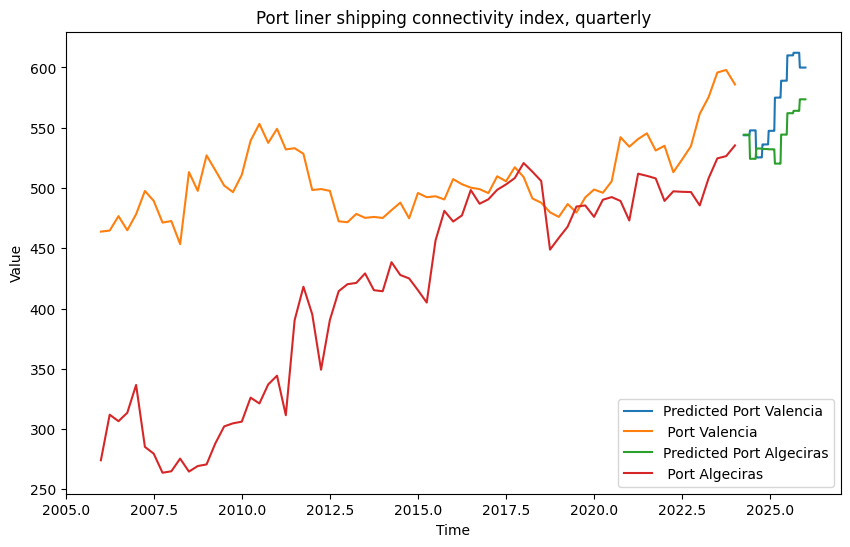

In [83]:
plt.figure(figsize=(10, 6))

plt.plot(np.linspace(2024.25,2026,100), predicted, label='Predicted Port Valencia')
plt.plot(np.linspace(2006,2024,len(palg_tensor.numpy().flatten())), palg_tensor.numpy().flatten(), label=' Port Valencia')
plt.plot(np.linspace(2024.25,2026,100), predalg, label='Predicted Port Algeciras')
plt.plot(np.linspace(2006,2024,len(palg_tensor.numpy().flatten())), palgpl, label=' Port Algeciras')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Port liner shipping connectivity index, quarterly')
plt.legend()
plt.show()